## **Functions**

In [73]:
import shutil
from collections.abc import Sequence
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

def to_sequences(seq_size, data1, data2):
    x = []
    y = []

    for i in range(len(data1)-seq_size):
        #print(i)
        window = data1[i:(i+seq_size)]
        after_window = data2[i+seq_size]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)

    return np.array(x), np.array(y)


## **Loading Data**

In [74]:
import os
import io
import requests
import sklearn
from aeon.datasets import load_regression
X, y, meta = load_regression("Covid3Month")
print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)
print(meta)

Shape of X =  (201, 1, 84)
Shape of y =  (201,)
{'problemname': 'covid3month', 'timestamps': False, 'missing': False, 'univariate': True, 'equallength': True, 'classlabel': False, 'targetlabel': True, 'class_values': []}


## **Splitting Data to Train and Test**

In [75]:
X_train, y_train = load_regression(
    "Covid3Month", extract_path="./Temp/", split="TRAIN", return_metadata=False
)
X_test, y_test = load_regression(
    "Covid3Month", extract_path="./Temp/", split="test", return_metadata=False
)
print("Train shape = ", X_train.shape)
print("Test shape = ", X_test.shape)
print(y_train.shape)
print(y_test.shape)

Train shape =  (140, 1, 84)
Test shape =  (61, 1, 84)
(140,)
(61,)


In [76]:
X

array([[[ 0.,  0.,  0., ...,  0.,  0., 12.]],

       [[ 0.,  0.,  0., ...,  9.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ...,  2.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  1.,  0.]],

       [[ 0.,  0.,  0., ...,  0., 13., 12.]]])

In [77]:
X.dtype

dtype('float64')

In [78]:
y

array([0.        , 0.07758621, 0.        , 0.        , 0.15400309,
       0.05555556, 0.00467563, 0.02857143, 0.00805611, 0.04794211,
       0.07079646, 0.02558824, 0.00958466, 0.08068783, 0.1       ,
       0.        , 0.01089701, 0.06451613, 0.04054054, 0.02373339,
       0.02752294, 0.12765957, 0.06060606, 0.03533314, 0.00687285,
       0.06413938, 0.04545455, 0.08181818, 0.02567976, 0.04218472,
       0.02906287, 0.10318238, 0.07017544, 0.03276131, 0.11764706,
       0.0396734 , 0.09703504, 0.05594406, 0.01045296, 0.        ,
       0.03333333, 0.08394227, 0.00552975, 0.0164468 , 0.        ,
       0.        , 0.04715102, 0.        , 0.02777778, 0.01413428,
       0.11111111, 0.        , 0.04972376, 0.03846154, 0.06756757,
       0.06254257, 0.01162791, 0.04454685, 0.        , 0.02122016,
       0.17307692, 0.01754386, 0.04449649, 0.01569078, 0.        ,
       0.        , 0.        , 0.        , 0.03159324, 0.01886792,
       0.075     , 0.        , 0.00993491, 0.00958216, 0.11111

In [79]:
first = X_train[1]

pd.DataFrame(first)

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,7.0,9.0,0.0,0.0


In [80]:
print(X_train.shape)

(140, 1, 84)


## **Normalization**

In [81]:
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')

In [82]:
# normalize the data values to the range [0, 1]
x_train /= 255
x_test /= 255

In [83]:
print(x_train)

[[[0.         0.         0.         ... 0.         0.         0.04705882]]

 [[0.         0.         0.         ... 0.03529412 0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]]

 ...

 [[0.         0.         0.         ... 0.25490198 0.15294118 0.14117648]]

 [[0.         0.         0.         ... 0.5019608  0.44705883 0.3529412 ]]

 [[0.         0.         0.         ... 0.01568628 0.02745098 0.01960784]]]


In [84]:
print(x_test)

[[[0.         0.         0.         ... 0.06666667 0.3647059  0.18039216]]

 [[0.         0.         0.         ... 0.11372549 0.04705882 0.01568628]]

 [[0.         0.         0.         ... 0.03921569 0.05098039 0.06666667]]

 ...

 [[0.         0.         0.         ... 0.00784314 0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.00392157 0.        ]]

 [[0.         0.         0.         ... 0.         0.05098039 0.04705882]]]


## **Sequence the data**

In [85]:
SEQUENCE_SIZE = 25
x_train, y_train = to_sequences(SEQUENCE_SIZE, x_train, y_train)
x_test, y_test = to_sequences(SEQUENCE_SIZE, x_test, y_test)
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (115, 25, 1, 1, 84)
Shape of x_test: (36, 25, 1, 1, 84)
Shape of y_train: (115,)
Shape of y_test: (36,)


## **Converting X to 4D Array**

In [86]:
x_train = x_train.reshape(x_train.shape[0],25,84,1)
x_test = x_test.reshape(x_test.shape[0],25,84,1)

In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(115, 25, 84, 1)
(36, 25, 84, 1)
(115,)
(36,)


## **Building CNN Regression Model (Relu & Adam)**

Epoch 1/100


c:\Users\SHREYA\anaconda3\envs\test\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 - 1s - loss: 0.4486 - val_loss: 0.2476 - 915ms/epoch - 229ms/step
Epoch 2/100
4/4 - 0s - loss: 0.7236 - val_loss: 0.1033 - 266ms/epoch - 67ms/step
Epoch 3/100
4/4 - 0s - loss: 0.3046 - val_loss: 0.0543 - 300ms/epoch - 75ms/step
Epoch 4/100
4/4 - 0s - loss: 0.1361 - val_loss: 0.0240 - 266ms/epoch - 67ms/step
Epoch 5/100
4/4 - 0s - loss: 0.0677 - val_loss: 0.0099 - 266ms/epoch - 67ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0438 - val_loss: 0.0064 - 266ms/epoch - 67ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0219 - val_loss: 0.0043 - 308ms/epoch - 77ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0186 - val_loss: 0.0031 - 265ms/epoch - 66ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0107 - val_loss: 0.0026 - 266ms/epoch - 67ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0042 - val_loss: 0.0025 - 275ms/epoch - 69ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0049 - val_loss: 0.0023 - 274ms/epoch - 69ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0029 - val_loss: 0.0021 - 300ms/epoch - 75ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0023

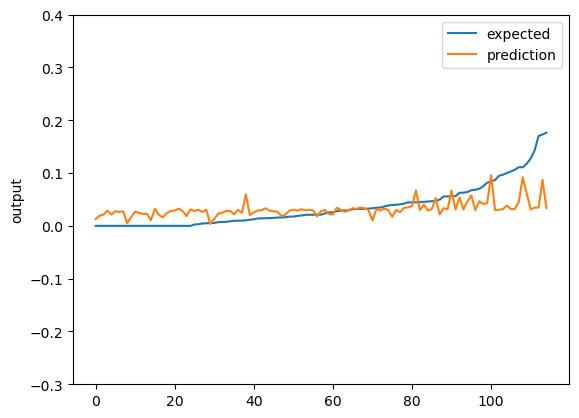

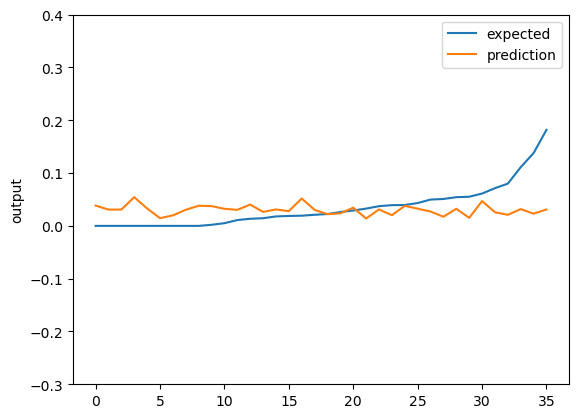

In [88]:
# Load modules
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
import matplotlib.pyplot as plt

# Define batch_size and # of epochs
batch_size = 128

# define input dimensions
row_seq, cols = x_train.shape[1], x_train.shape[2]

checkpointer = ModelCheckpoint(filepath="dnn/best_weights.hdf5", verbose=0, save_best_only=True) # save best model
input_shape=(row_seq,cols,1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(1, 3), strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1,2)))
model.add(Conv2D(64, (1, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,2), strides=None))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001, decay=1e-6))
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor,checkpointer],verbose=2, epochs=100)
model.load_weights('dnn/best_weights.hdf5')
model.summary()

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.ylim([-0.3,0.4])
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()


pred_train = model.predict(x_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train, y_train))
print("Score_train (RMSE): {}".format(score_train))

pred_test = model.predict(x_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test, y_test))
print("Score_test (RMSE): {}".format(score_test))

# Chart_regression
chart_regression(pred_train.flatten(), y_train, sort = True)
chart_regression(pred_test.flatten(), y_test, sort = True)

## **Building CNN Regression Model (Relu & sgd)**

Epoch 1/100


c:\Users\SHREYA\anaconda3\envs\test\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 - 1s - loss: 0.2111 - val_loss: 0.0516 - 744ms/epoch - 186ms/step
Epoch 2/100
4/4 - 0s - loss: 0.3522 - val_loss: 0.0370 - 257ms/epoch - 64ms/step
Epoch 3/100
4/4 - 0s - loss: 0.3090 - val_loss: 0.0696 - 174ms/epoch - 43ms/step
Epoch 4/100
4/4 - 0s - loss: 0.1709 - val_loss: 0.0468 - 177ms/epoch - 44ms/step
Epoch 5/100
4/4 - 0s - loss: 0.2688 - val_loss: 0.0450 - 168ms/epoch - 42ms/step
Epoch 6/100
4/4 - 0s - loss: 0.1675 - val_loss: 0.0373 - 186ms/epoch - 46ms/step
Epoch 7/100
4/4 - 0s - loss: 0.2549 - val_loss: 0.0755 - 162ms/epoch - 40ms/step
Epoch 7: early stopping
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 25, 82, 32)        128       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 25, 41, 32)       0         
 g2D)                                                            
 

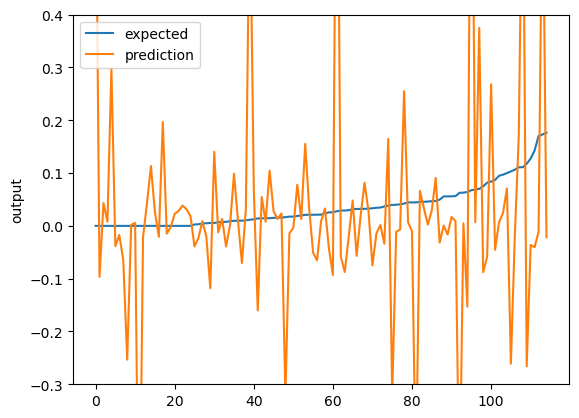

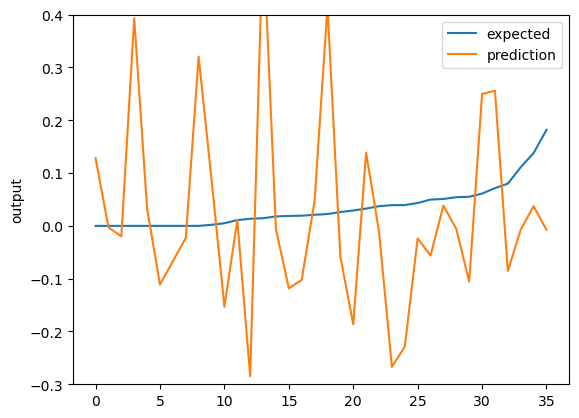

In [89]:
# Load modules
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
import matplotlib.pyplot as plt

# Define batch_size and # of epochs
batch_size = 128

# define input dimensions
row_seq, cols = x_train.shape[1], x_train.shape[2]

checkpointer = ModelCheckpoint(filepath="dnn/best_weights.hdf5", verbose=0, save_best_only=True) # save best model
input_shape=(row_seq,cols,1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(1, 3), strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1,2)))
model.add(Conv2D(64, (1, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,2), strides=None))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.001, decay=1e-6))
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor,checkpointer],verbose=2, epochs=100)
model.load_weights('dnn/best_weights.hdf5')
model.summary()

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.ylim([-0.3,0.4])
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()


pred_train = model.predict(x_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train, y_train))
print("Score_train (RMSE): {}".format(score_train))

pred_test = model.predict(x_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test, y_test))
print("Score_test (RMSE): {}".format(score_test))

# Chart_regression
chart_regression(pred_train.flatten(), y_train, sort = True)
chart_regression(pred_test.flatten(), y_test, sort = True)

## **Building CNN Regression Model (tanh & Adam)**

Epoch 1/100


c:\Users\SHREYA\anaconda3\envs\test\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 - 1s - loss: 0.8149 - val_loss: 0.6298 - 933ms/epoch - 233ms/step
Epoch 2/100
4/4 - 0s - loss: 0.5664 - val_loss: 0.3541 - 275ms/epoch - 69ms/step
Epoch 3/100
4/4 - 0s - loss: 0.2207 - val_loss: 0.1840 - 316ms/epoch - 79ms/step
Epoch 4/100
4/4 - 0s - loss: 0.1668 - val_loss: 0.1547 - 308ms/epoch - 77ms/step
Epoch 5/100
4/4 - 0s - loss: 0.1458 - val_loss: 0.1420 - 315ms/epoch - 79ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0882 - val_loss: 0.1072 - 299ms/epoch - 75ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0801 - val_loss: 0.0365 - 275ms/epoch - 69ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0584 - val_loss: 0.0265 - 266ms/epoch - 67ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0385 - val_loss: 0.0411 - 184ms/epoch - 46ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0320 - val_loss: 0.0555 - 216ms/epoch - 54ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0214 - val_loss: 0.0479 - 192ms/epoch - 48ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0277 - val_loss: 0.0331 - 200ms/epoch - 50ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0207

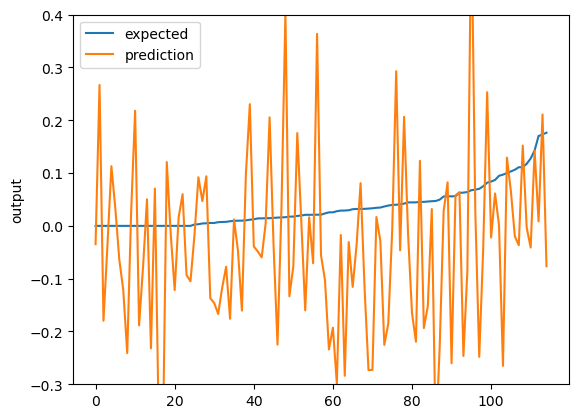

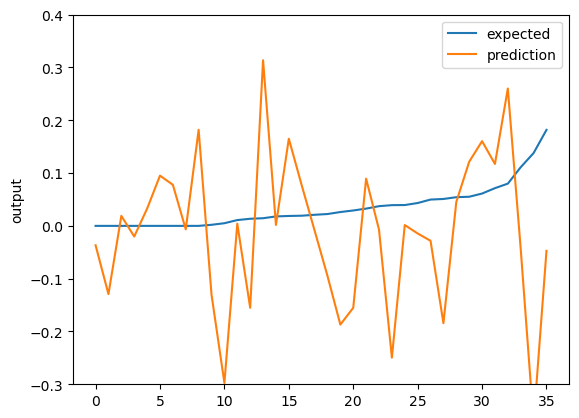

In [90]:
# Load modules
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
import matplotlib.pyplot as plt

# Define batch_size and # of epochs
batch_size = 128

# define input dimensions
row_seq, cols = x_train.shape[1], x_train.shape[2]

checkpointer = ModelCheckpoint(filepath="dnn/best_weights.hdf5", verbose=0, save_best_only=True) # save best model
input_shape=(row_seq,cols,1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(1, 3), strides=(1, 1), padding='valid',
                 activation='tanh',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1,2)))
model.add(Conv2D(64, (1, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(1,2), strides=None))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001, decay=1e-6))
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor,checkpointer],verbose=2, epochs=100)
model.load_weights('dnn/best_weights.hdf5')
model.summary()

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.ylim([-0.3,0.4])
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()


pred_train = model.predict(x_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train, y_train))
print("Score_train (RMSE): {}".format(score_train))

pred_test = model.predict(x_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test, y_test))
print("Score_test (RMSE): {}".format(score_test))

# Chart_regression
chart_regression(pred_train.flatten(), y_train, sort = True)
chart_regression(pred_test.flatten(), y_test, sort = True)

## **Building CNN Regression Model (tanh & Sgd)**

Epoch 1/100


c:\Users\SHREYA\anaconda3\envs\test\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 - 1s - loss: 0.0333 - val_loss: 0.0091 - 762ms/epoch - 190ms/step
Epoch 2/100
4/4 - 0s - loss: 0.0349 - val_loss: 0.0083 - 249ms/epoch - 62ms/step
Epoch 3/100
4/4 - 0s - loss: 0.0313 - val_loss: 0.0079 - 208ms/epoch - 52ms/step
Epoch 4/100
4/4 - 0s - loss: 0.0299 - val_loss: 0.0076 - 216ms/epoch - 54ms/step
Epoch 5/100
4/4 - 0s - loss: 0.0358 - val_loss: 0.0077 - 200ms/epoch - 50ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0301 - val_loss: 0.0078 - 208ms/epoch - 52ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0348 - val_loss: 0.0076 - 182ms/epoch - 46ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0264 - val_loss: 0.0075 - 241ms/epoch - 60ms/step
Epoch 8: early stopping
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 25, 82, 32)        128       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 25, 41, 32)    

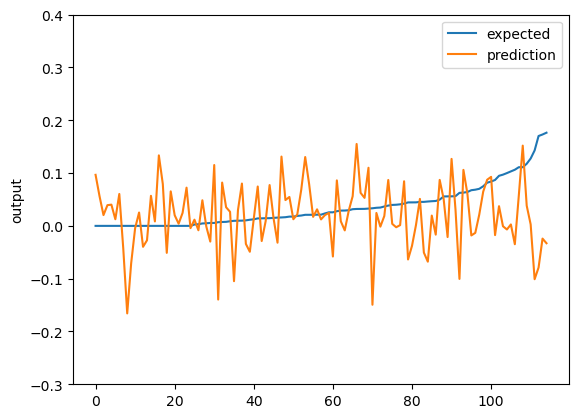

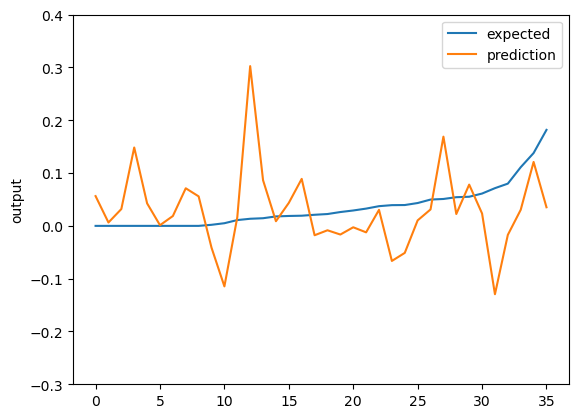

In [91]:
# Load modules
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
import matplotlib.pyplot as plt

# Define batch_size and # of epochs
batch_size = 128

# define input dimensions
row_seq, cols = x_train.shape[1], x_train.shape[2]

checkpointer = ModelCheckpoint(filepath="dnn/best_weights.hdf5", verbose=0, save_best_only=True) # save best model
input_shape=(row_seq,cols,1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(1, 3), strides=(1, 1), padding='valid',
                 activation='tanh',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1,2)))
model.add(Conv2D(64, (1, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(1,2), strides=None))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.001, decay=1e-6))
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor,checkpointer],verbose=2, epochs=100)
model.load_weights('dnn/best_weights.hdf5')
model.summary()

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.ylim([-0.3,0.4])
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()


pred_train = model.predict(x_train)
score_train = np.sqrt(metrics.mean_squared_error(pred_train, y_train))
print("Score_train (RMSE): {}".format(score_train))

pred_test = model.predict(x_test)
score_test = np.sqrt(metrics.mean_squared_error(pred_test, y_test))
print("Score_test (RMSE): {}".format(score_test))

# Chart_regression
chart_regression(pred_train.flatten(), y_train, sort = True)
chart_regression(pred_test.flatten(), y_test, sort = True)